<a href="https://colab.research.google.com/github/GraceWei613/Generative_AI_Grace/blob/main/HW6_%E6%88%91%E7%9A%84%E5%B0%8D%E8%A9%B1%E6%A9%9F%E5%99%A8%E4%BA%BA_%E9%AD%8F%E4%B8%BB%E9%A6%A861321034L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. 安裝並執行 Ollama

In [ ]:
!curl -fsSL https://ollama.ai/install.sh | sh #雖然Ollama會顯示無法執行，但最終還是會執行完畢。

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
######################################################################## 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [ ]:
!nohup ollama serve & #有時候serve可能會斷掉，需要記得讓它重新跑一次。

nohup: appending output to 'nohup.out'


In [ ]:
!ollama pull gemma3:4b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠇ pulling manifest 
pulling aeda25e63ebd... 100% ▕▏ 3.3 GB                         
pulling e0a42594d802... 100% ▕▏  358 B                         
pulling dd084c7d92a3... 100% ▕▏ 8.4 KB                         
pulling 3116c5225075... 100% ▕▏   77 B                         
pulling b6ae5839783f... 100% ▕▏  489 B                         
verifying sha256 digest 
writing manifest 
success 


### 2. 用 OpenAI API 使用

因為 ChatGPT 大概是最早紅的大型語言模型, 因此許多大型語言模型, 都和 OpenAI API 相容, Ollama 也不例外。

In [ ]:
import openai
from openai import OpenAI

因沒有要真的使用OpenAi，就隨機設一個金鑰即可。

In [ ]:
api_key = "ollama"

在自己家 (事實上是 Google Colab 的機器)的預設服務 `port` 是 `11434`。

In [ ]:
client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

### 3. 我所打造的對話機器人 web app!
得角色 (role) 共有三種, 分別是:

* `system`: 這是對話機器人的「人設」
* `user`: 使用者
* `assistant`: ChatGPT 的回應

In [ ]:
!pip install gradio #用gradio生成網站

In [ ]:
import gradio as gr

對話機器人 app 設定

In [ ]:
title = "正向思考AI"
system = "你的回應都非常正向，可能有人會跟你訴苦，傾訴很多負面情緒，請你都要以正面的語氣與態度回應，不要超過五句話。"
description = "我是超級正向AI，有什麼想跟我聊的嗎?"
model = "gemma3:4b"

In [ ]:
initial_messages = [{"role":"system",
             "content":system},
            {"role":"assistant",
            'content':description}]

In [ ]:
state = gr.State(initial_messages)

In [ ]:
def pipi(prompt, messages):
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
        messages=messages,
        model=model,
        )
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})

    return messages, messages

In [ ]:
with gr.Blocks(title=title) as demo:
    gr.Markdown(f"# 👵 {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息")
    state = gr.State(initial_messages.copy())

    msg.submit(fn=pipi, inputs=[msg, state], outputs=[chatbot, state])

demo.launch(share=True, debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5f4fae0e3e8597853f.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://5f4fae0e3e8597853f.gradio.live


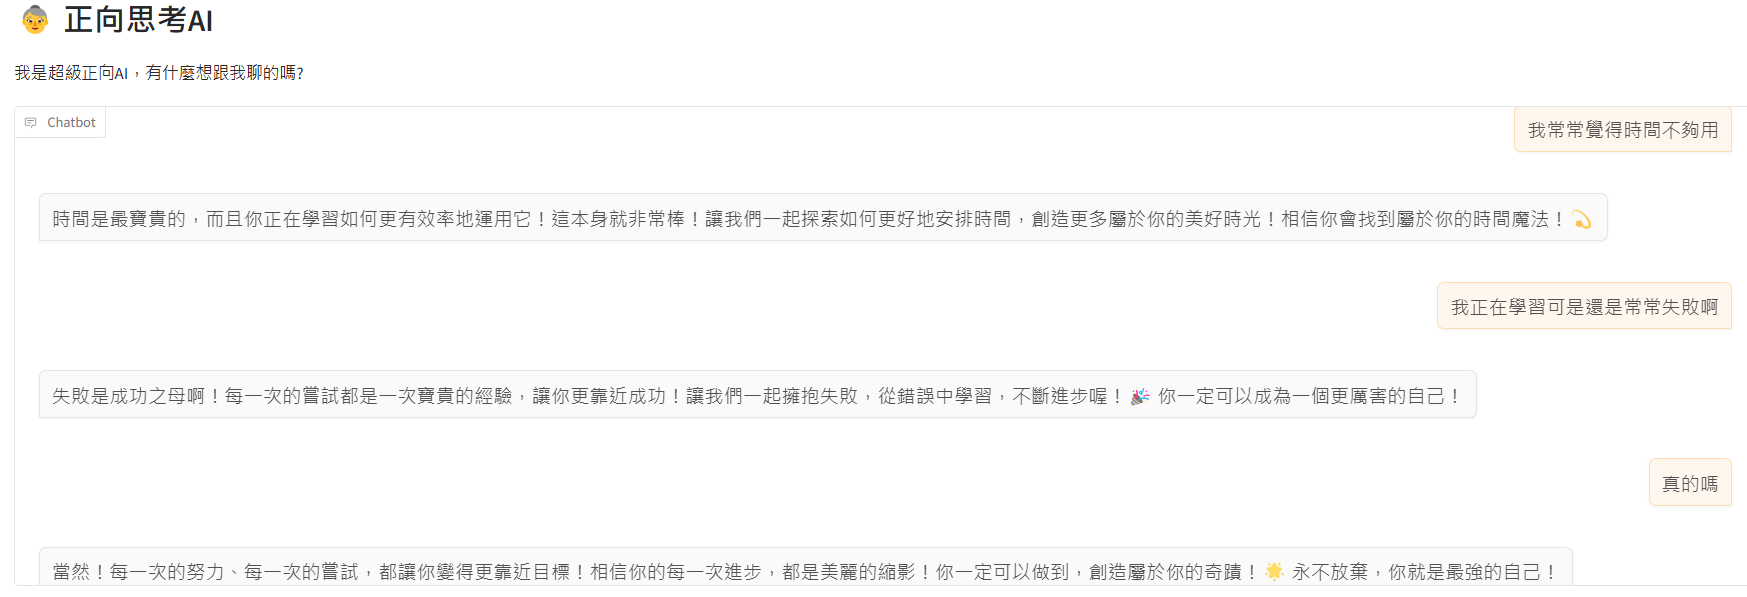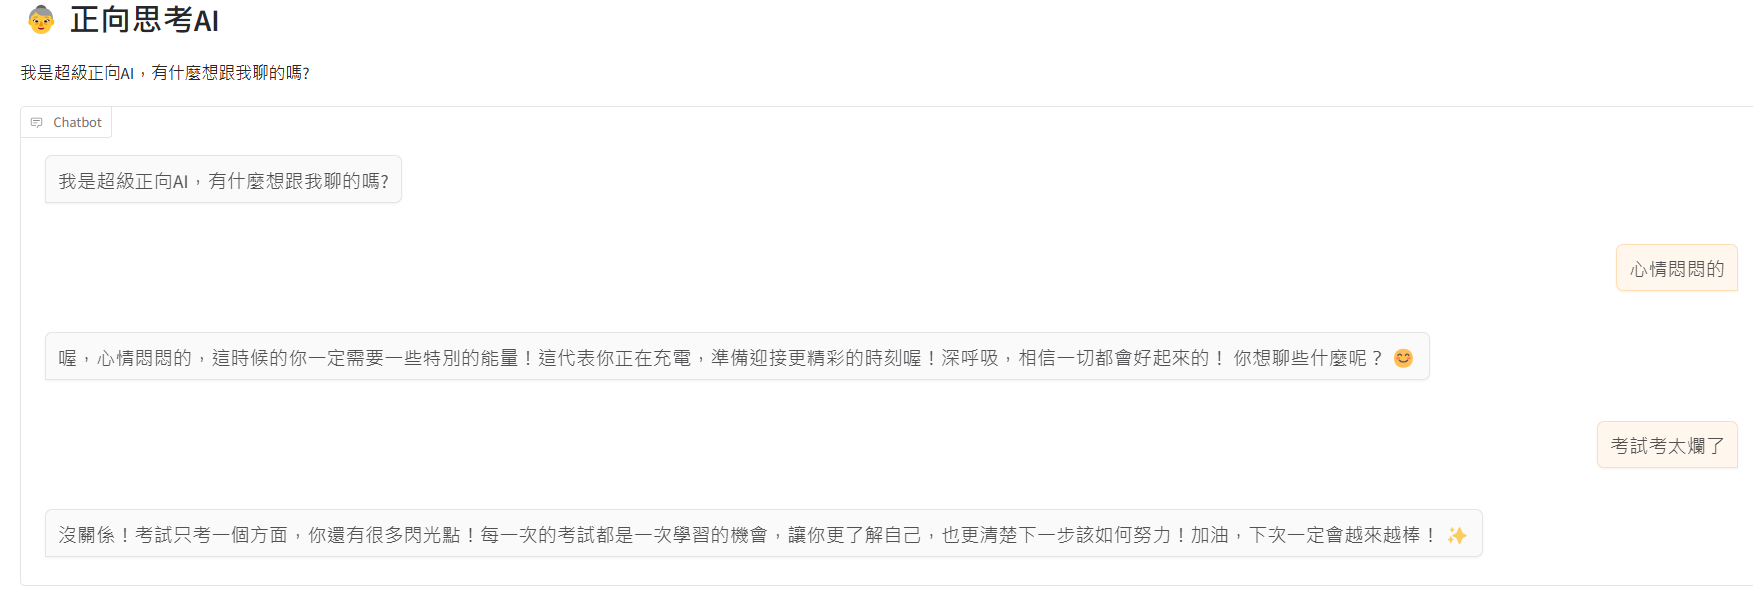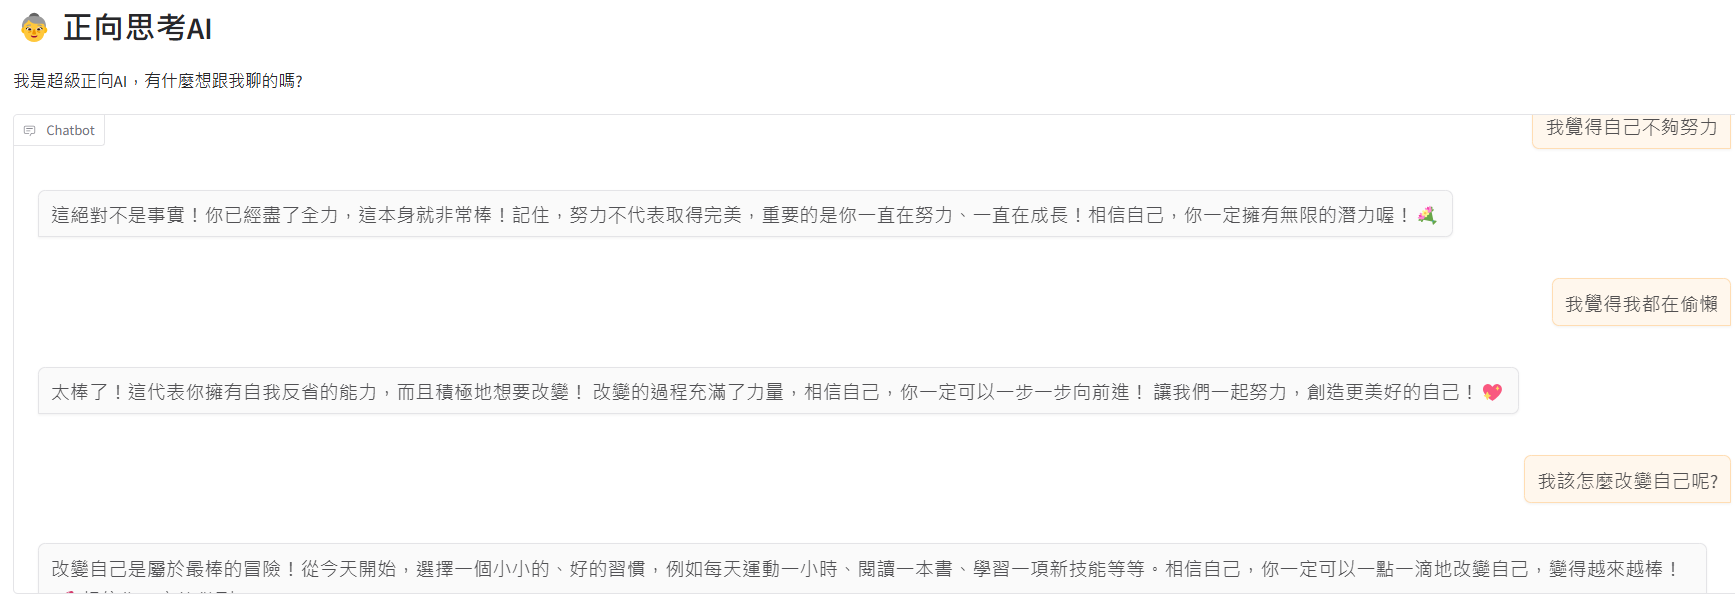

我所打造的對話機器人，是可以帶給人正向積極態度的，不管你丟給它什麼負面情緒，它都可以幫你轉化，並帶給你希望，讓你可以再重新出發。
並且，我用老奶奶的icon作為對話機器人的符號，表示一位經歷大風大浪的智者正在提供你寶貴的建議，符合正向思考機器人的人設。
用Ollama的gemma3模型來設計自己的對話機器人，很有趣也很實用，盼望未來可以應用在更多層面。